In [1]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

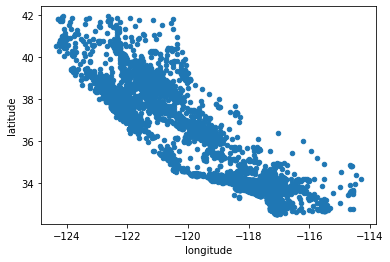

In [2]:
download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_PATH = "datasets//housing"
housing_URL = download_root + housing_PATH + "/housing.tgz"
######################################################################################
def get_housing_data(housing_url=housing_URL, housing_path=housing_PATH):
    if not os.path.isdir(housing_PATH):
        os.makedirs(housing_PATH)
    tgz_path = os.path.join(housing_PATH, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_PATH)
    housing_tgz.close()

def load_housing_data(housing_path=housing_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

####################################################################################################3
housing = load_housing_data()
print(housing.info)

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices =np.random.permutation(len(data))
    print(shuffled_indices)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

housing = train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

In [3]:
corr_matrix = housing.corr()
print( corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64


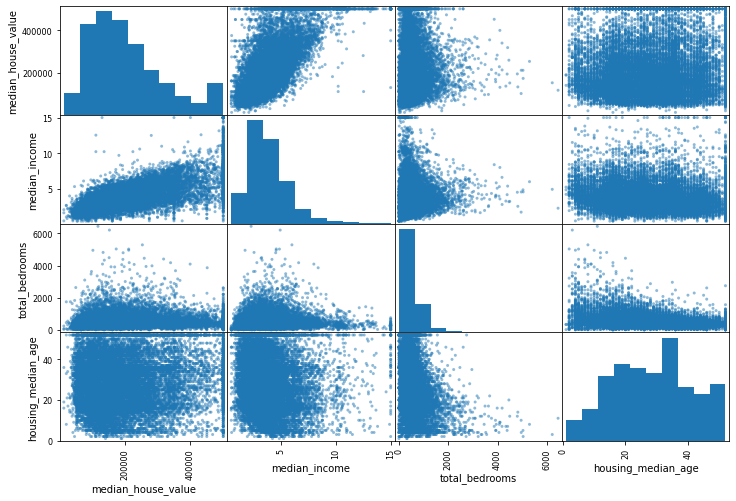

In [4]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_bedrooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8)) 
plt.show()

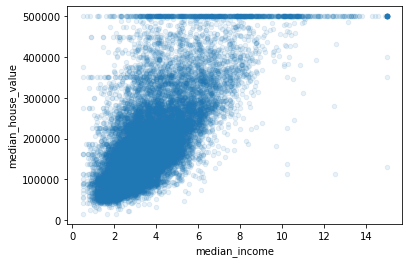

In [5]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)
plt.show()

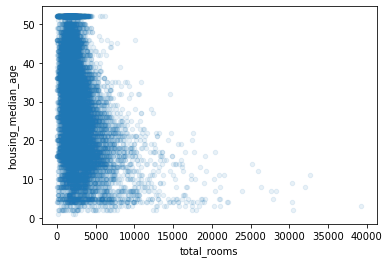

In [6]:
housing.plot(kind="scatter", x="total_rooms", y="housing_median_age",
alpha=0.1)
plt.show()

In [7]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
corr_matrix = housing.corr()
print( corr_matrix["median_house_value"].sort_values(ascending=False))
print("----------------------------")
print(corr_matrix)

median_house_value     1.000000
median_income          0.690647
rooms_per_household    0.158485
total_rooms            0.133989
housing_median_age     0.103706
households             0.063714
total_bedrooms         0.047980
population            -0.026032
longitude             -0.046349
latitude              -0.142983
Name: median_house_value, dtype: float64
----------------------------
                     longitude  latitude  housing_median_age  total_rooms  \
longitude             1.000000 -0.924485           -0.101818     0.038676   
latitude             -0.924485  1.000000            0.005296    -0.029224   
housing_median_age   -0.101818  0.005296            1.000000    -0.360922   
total_rooms           0.038676 -0.029224           -0.360922     1.000000   
total_bedrooms        0.063064 -0.059998           -0.320624     0.930489   
population            0.094276 -0.102499           -0.292283     0.857936   
households            0.049306 -0.064061           -0.302796     0.9204

In [4]:
#housing.drop("total_bedrooms", axis=1, inplace=True)
housing_labels = train_set["median_house_value"].copy()


In [6]:
from sklearn.impute import SimpleImputer
housing_num= housing.drop("ocean_proximity", axis=1)

imputer= SimpleImputer(strategy="median")
imputer.fit(housing_num)

imputer.statistics_


array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1670e+03,  4.1000e+02,  3.5458e+00,  1.7985e+05])

In [12]:
housing_num.median().values


array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.12900000e+03,
        1.16700000e+03,  4.10000000e+02,  3.54580000e+00,  1.79850000e+05,
        5.23587365e+00])

In [7]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0


In [14]:
housing_cat = housing[['ocean_proximity']]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [15]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
housingCat_1hot = cat_encoder.fit_transform(housing_cat)
#pd.get_dummies(housing,columns=['ocean_proximity'])
housingCat_1hot

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribute_adder', CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())])

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.head())

NameError: name 'CombinedAttributeAdder' is not defined

In [ ]:
                   #Task4

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [29]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [103000. 382100. 172600.  93400.  96500.]


In [30]:
print("Labels:", list(some_labels))

Labels: [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [31]:
some_data_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025,  0.22256942,  0.76827628,
         0.32290591, -0.326196  , -0.90118909, -0.17491646,  0.30769213,
         0.25617176,  0.03421   ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813,  0.34029326, -0.09890135,
         0.6720272 , -0.03584338,  1.5127714 , -0.40283542,  0.19110965,
         0.30843574, -0.07325351,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, -0.34259695, -0.44981806,
        -0.43046109,  0.14470145, -0.29921255,  0.08821601, -0.5068908 ,
        -0.5480346 , -0.04422009,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [ 1.23269811, -1.38217186,  0.58654547, -0.56148971, -0.00743434,
        -0.38058662, -1.01786438, -0.98422033, -0.60001532, -0.06099795,
         0.19511202,  0.11533265,  0.        ,  0.        ,  0.        ,
         0.        

In [34]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [49]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [282.08193691  85.40602357  98.41259762  93.55357476  80.42889272
  86.62876371 369.42504643 104.79133314 144.53501124 101.74134971]
Mean: 144.70045297966118
Standard deviation: 94.12258890214703


In [50]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.64158153e-10 4.32964148e-10 4.52277137e-10 2.15940484e-10
 4.19110240e-10 2.92464661e-10 5.35810475e-10 3.05611834e-10
 4.09044595e-10 5.24326954e-10]
Mean: 3.951708680709494e-10
Standard deviation: 9.673186138845285e-11


In [47]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [51]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

33.06493841112945

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42) 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
grid_search.best_params_


{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

In [52]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

27859.4673242731 {'max_features': 2, 'n_estimators': 3}
22104.453306302996 {'max_features': 2, 'n_estimators': 10}
22736.5271287166 {'max_features': 2, 'n_estimators': 30}
20898.216540483932 {'max_features': 4, 'n_estimators': 3}
13268.004757559356 {'max_features': 4, 'n_estimators': 10}
11641.117673022094 {'max_features': 4, 'n_estimators': 30}
12313.980894994973 {'max_features': 6, 'n_estimators': 3}
7030.313767001907 {'max_features': 6, 'n_estimators': 10}
5554.789607936828 {'max_features': 6, 'n_estimators': 30}
4412.431738953079 {'max_features': 8, 'n_estimators': 3}
3633.6121839536795 {'max_features': 8, 'n_estimators': 10}
2834.2063503853365 {'max_features': 8, 'n_estimators': 30}
26845.285856225317 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
20180.4378346558 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
22087.278379638294 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
15313.555523956999 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [53]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([3.09334627e-03, 6.81498475e-03, 1.72428989e-03, 6.23206739e-04,
       7.04782135e-04, 6.10504665e-04, 1.14254583e-01, 7.44466196e-01,
       1.47842777e-02, 6.99115203e-04, 9.55011815e-04, 2.83685191e-02,
       2.75667918e-03, 7.98512606e-02, 1.44748482e-09, 7.07128150e-05,
       2.22528144e-04])

In [55]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.7444661961716875, 'median_house_value'),
 (0.11425458345505245, 'median_income'),
 (0.07985126056251152, 'INLAND'),
 (0.02836851907362448, 'bedrooms_per_room'),
 (0.01478427768524231, 'rooms_per_household'),
 (0.00681498475128914, 'latitude'),
 (0.003093346265237602, 'longitude'),
 (0.0027566791806899658, '<1H OCEAN'),
 (0.0017242898911112084, 'housing_median_age'),
 (0.0009550118151258654, 'pop_per_hhold'),
 (0.0007047821347516309, 'population'),
 (0.0006991152025330241, 'rooms_per_hhold'),
 (0.0006232067392881205, 'total_rooms'),
 (0.000610504665335716, 'households'),
 (0.00022252814406621, 'NEAR OCEAN'),
 (7.071281496845399e-05, 'NEAR BAY'),
 (1.447484822663017e-09, 'ISLAND')]